# **PRAKTIKUM KE-2 [AS2112] ASTRONOMI KOMPUTASI**
> **Metode Pencocokan Kurva: Interpolasi & Regresi**

---

Nama: **Sulthon Furqandhani Araska**

NIM: **10321013**

Kelompok: **3**

Hari, tanggal: Rabu, **26/10/2022** dan **02/11/2022**

[**Modul praktikum ke-2**](https://drive.google.com/drive/folders/18NX9a2diGwO6Z_3b7Xa4RLD8xFll0Wtn)

## **1. Interpolasi**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Dataframe tabel data waktu pengamatan dan temperatur
input_data = {}
input_data["Waktu"] = [0, 20, 40, 60, 80, 100]
input_data["Temperatur"] = [26.0, 48.6, 61.6, 71.2, 74.8, 75.2]
df0 = pd.DataFrame(data= input_data)
print("Tabel data waktu pengamatan dan temperatur")
print(df0)

#Pembuatan array waktu & temperatur
t = df0["Waktu"].to_numpy()       #Waktu pengamatan
T = df0["Temperatur"].to_numpy()  #Temperatur
tt = [10,30,50,70,90]             #Waktu yang akan diinterpolasi

Tabel data waktu pengamatan dan temperatur
   Waktu  Temperatur
0      0        26.0
1     20        48.6
2     40        61.6
3     60        71.2
4     80        74.8
5    100        75.2


### i. Interpolasi Linear
> **Latihan (1)**

In [4]:
#Definisi fungsi interpolan
def Linear(x):
  return T0 + (T1 - T0)*(x - t0)/(t1 - t0)

#Iterasi perhitungan
Hasil_Linear = []
for i in range(len(t)-1):
  t0 = t[i]
  t1 = t[i+1]
  T0 = T[i]
  T1 = T[i+1]
  x = tt[0]
  Hasil_Linear.append(Linear(tt[i]))

#Penyajian data
input_data = {}
input_data["Waktu"] = tt
input_data["Temperatur"] = Hasil_Linear
df1 = pd.DataFrame(data= input_data)
print("Tabel data waktu pengamatan dan temperatur hasil interpolasi linear")
print(df1)

Tabel data waktu pengamatan dan temperatur hasil interpolasi linear
   Waktu  Temperatur
0     10        37.3
1     30        55.1
2     50        66.4
3     70        73.0
4     90        75.0


### ii. Interpolasi Metode Langrange
> **Latihan (2)**



In [5]:
#Fungsi interpolan Langrange
def Lagrange(x):
  Tt = 0  #Inisiasi nilai awal sama dengan nol
  #Loop notasi Σ untuk menghitung suhu
  for i in range (len(t)):
    l = 1
    #Loop notasi ∏ untuk fungsi l(x)
    for j in range (len(t)):
      if j != i:
        l *= (tt - t[j])/(t[i]-t[j])
    Tt += T[i]*l
  return Tt

Hasil_Lagrange = []
Hasil_Lagrange.append(Lagrange(tt[i]))

#Penyajian data
input_data = {}
input_data["Waktu"] = tt
input_data["Temperatur"] = Hasil_Lagrange[0]
df2 = pd.DataFrame(data= input_data)
print("Tabel data waktu pengamatan dan temperatur hasil interpolasi Lagrange")
print(df2)

Tabel data waktu pengamatan dan temperatur hasil interpolasi Lagrange
   Waktu  Temperatur
0     10   39.619531
1     30   55.539844
2     50   66.947656
3     70   73.867969
4     90   74.625781


<function matplotlib.pyplot.show(*args, **kw)>

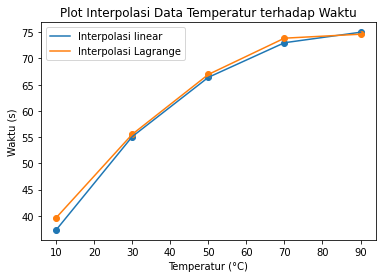

In [6]:
#Grafik scatter plot
plt.scatter(tt, Hasil_Linear)
plt.scatter(tt, Hasil_Lagrange)
plt.plot(tt, Hasil_Linear, label = "Interpolasi linear")
plt.plot(tt, Hasil_Lagrange[0], label = "Interpolasi Lagrange")
plt.title("Plot Interpolasi Data Temperatur terhadap Waktu")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Waktu (s)")
plt.legend()
plt.show

### iii. Mencoba Sub-paket Interpolasi pada Python

> **Latihan (3). Mencoba sub-paket pada library scipy untuk interpolasi**

In [7]:
#Library (kumpukan modul dan paket) yang dapat dimuat antara lain: numpy, scipy, matplotlib, dan pandas
import numpy as np
import scipy.interpolate          # Import sub-paket untuk interpolasi
import matplotlib.pyplot as plt   # Import Sub-paket untuk plot
import pandas as pd               # Import library untuk manipulasi dan analisis data,
                                  # terdapat sub-paket untuk membaca file csv

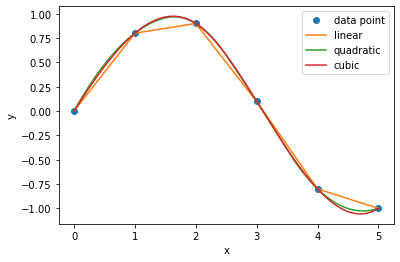

In [8]:
#Berikut ini merupakan contoh dari pembacaan file dalam format CSV (mycsv.csv)
#yang berisi dua kolom data dengan memanfaatkan library pandas
data = pd.read_csv('mycsv.csv', sep=';', header=0)
x = data['X']
y = data['Y']

#Definisikan titik data yang akan di-interpolasi. Gunakan finer and regular mesh
n = 10
xfine = np.linspace(x[0], x[len(data) - 1], n*100) #membuat 1000 titik data baru dalam rentang data x

# Penjelasan scipy.interpolate: https://docs.scipy.org/doc/scipy/reference/interpolate.html

# Interpolasi dengan fungsi linear (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind = 'linear')
y1(xfine)

#interpolasi dengan fungsi kuadratik (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind = 'quadratic')
y2(xfine)

#interpolasi dengan fungsi kubik (p=3)
y3 = scipy.interpolate.interp1d(x, y, kind = 'cubic')
y3(xfine)

# Plot data dan hasil interpolasi (y1, y2, dan y3)
plt.plot(x,y,'o', label = 'data point')
plt.plot(xfine,y1(xfine),label = 'linear')
plt.plot(xfine,y2(xfine),label = 'quadratic')
plt.plot(xfine,y3(xfine),label = 'cubic')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> **Latihan (4). Menggunakan scipy.interpolate**

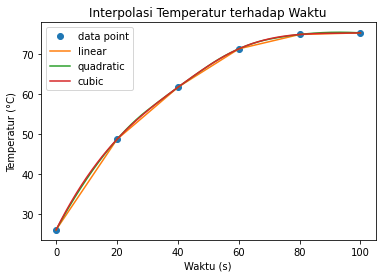

Temperatur hasil interpolasi pada t=50 adalah 66.945 °C.


In [9]:
# Definisikan titik data yang akan di-interpolasi. Gunakan finer and regular mesh
xfine = np.linspace(t[0], t[len(t) - 1], 1000) #membuat 1000 titik data baru dalam rentang data x

# Interpolasi dengan fungsi linear, kuadratik, & kubik
T1 = scipy.interpolate.interp1d(t, T, kind = 'linear')
T2 = scipy.interpolate.interp1d(t, T, kind = 'quadratic')
T3 = scipy.interpolate.interp1d(t, T, kind = 'cubic')

# Plot data dan hasil interpolasi (T1, T2, dan T3)
plt.plot(t,T,'o', label = 'data point')
plt.plot(xfine,T1(xfine),label = 'linear')
plt.plot(xfine,T2(xfine),label = 'quadratic')
plt.plot(xfine,T3(xfine),label = 'cubic')
plt.xlabel('Waktu (s)')
plt.ylabel('Temperatur (°C)')
plt.title("Interpolasi Temperatur terhadap Waktu")
plt.legend()
plt.show()

#Mencari nilai temperatur pada t=50
Tt = scipy.interpolate.interp1d(t, T, kind = 'cubic')
print("Temperatur hasil interpolasi pada t=50 adalah", Tt(50), "°C.")

> **Latihan (5) Aplikasi pada data astronomi**

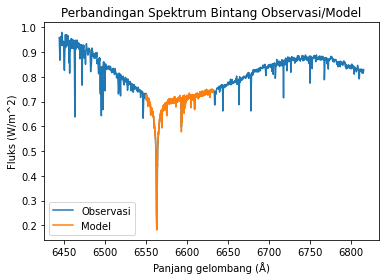

In [10]:
# Membaca data spektrum bintang terobservasi
star255 = pd.read_csv('star255.csv', header=0)
λo = star255['lamstar2555_665']                     #Panjang gelombang yang terobservasi
Fo = star255['star2555_665']                        #Fluks yang terobservasi

# Membaca data spektrum bintang sintesis
syntstar2555 = pd.read_csv('syntstar2555.csv', header=0)
λs = syntstar2555['lamsyntstar2555_v0range655666']  #Panjang gelombang model
Fs = syntstar2555['syntstar2555_v0range655666']     #Fluks model

# Mendefinisikan titik data yang akan di-interpolasi...
x1 = np.linspace(λo[0], λo[len(star255) - 1], 1000) #untuk panjang gelombang yang terobservasi
x2 = np.linspace(λs[0], λs[len(star255) - 1], 1000) #untuk Panjang gelombang model

# Interpolasi dengan fungsi linear
F1 = scipy.interpolate.interp1d(λo, Fo, kind = 'linear')  #...untuk spektrum terobservasi
F2 = scipy.interpolate.interp1d(λs, Fs, kind = 'linear')  #...untuk spektrum model

# Plot hasil interpolasi
plt.plot(x1, F1(x1), label = 'Observasi')           #Plot spektrum terobservasi
plt.plot(x2, F1(x2), label = 'Model')               #Plot spektrum model
plt.xlabel('Panjang gelombang (Å)') 	              #Label sumbu horizontal
plt.ylabel('Fluks (W/m^2)')                         #Label sumbu vertikal
plt.title("Perbandingan Spektrum Bintang Observasi/Model")
plt.legend()
plt.show()

## **2. Regresi**

### i. Regresi Linear

> **Latihan (6). Mencoba algoritma regresi linear**

In [11]:
#Tabel data nilai absis (x) & ordinat (y)
x = [3, 4, 5, 6, 7, 8]
y = [0, 7, 17, 26, 35, 45]

n = len(x)                        #Jumlah datapoints merupakan banyaknya pasangan koordinat
sumx = sumx2 = sumxy = sumy = 0   #Inisiasi nilai sama dengan nol sebelum iterasi

#Perumusan regresi linear
for i in range(n):    #Iterasi untuk menghitung nilai...
  sumx += x[i]        #...Σx,
  sumx2 += x[i]**2    #...Σ(x^2),
  sumxy += x[i]*y[i]  #...Σ(xy), dan
  sumy += y[i]        #...Σy.
xm = sumx / n         #Nilai rata-rata x
ym = sumy / n         #Nilai rata-rata y
#Pendefinisian nilai koefisien dari fungsi regresi linear:
a = (ym*sumx2 - xm*sumxy)/(sumx2 - n*xm**2)   #Koefisien suku derajat-0 (konstanta)
b = (sumxy - xm*sumy)/(sumx2 - n*xm**2)       #Koefisien suku derajat-1

#Menampilkan persamaan garis regresi linear
print('The straight line equation:')
print('f(x) = (%.3f) + (%.3f)x'%(a,b))

The straight line equation:
f(x) = (-28.305) + (9.086)x


> **Latihan (7). Mencoba sub-paket regresi pada library python**

In [12]:
#Impor library yang akan digunakan
import numpy as np                    #Numpy untuk membantu perhitungan matematis
from scipy.optimize import curve_fit  #Scipy untuk melakukan optimasi
import matplotlib.pyplot as plt       #Matplotlib untuk visualisasi data
import pandas as pd                   #Pandas untuk pengolahan data

#Membaca data & mengonversi data per kolom menjadi list terpisah
data = pd.read_csv('mycsv.csv', sep=';', header=0)  #Membaca data yang akan digunakan dari dataframe
x = data['X']       #Membuat list bernama 'x' berisi data pada kolom 'X'
y = data['Y']       #Membuat list bernama 'y' berisi data pada kolom 'Y'

Regresi Linear

Best parameter values: [-0.30285714  0.75714286]


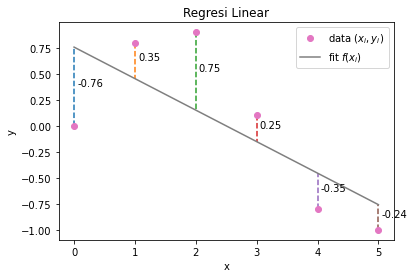

In [13]:
#Definisi fungsi regresi
def f(x, a1, a0):   ##Pendefinisian fungsi refresi linear sebagai komponen dari variabel (x) dan koefisien (a)
  return a1*x + a0  #Ekspresi persamaan garis regresi linear

#Perhitungan regresi
init_vals = [1, 1]  #list berisi nilai-nilai dugaan awal untuk masing-masing koefisien (a).
popt, pcov = curve_fit(f, x, y, p0=init_vals)     #"Pencocokan garis" (curve fitting) berdasarkan nilai-nilai x & y
print('Best parameter values: {}'.format(popt))   #Menampilkan nilai-nilai koefisien dari persamaan garis regresi linear
xfitted = np.linspace(x[0], x[len(data)-1], 50)   #Membuat set 50 nilai x untuk membentuk garis regresi linear

#Membuat plot residual
ypred = f(x, popt[0], popt[1])  #Menyatakan fungsi residual
for i in range(len(data)):      #Iterasi untuk setiap set data
  xres = [x[i], x[i]]                       #Residual untuk nilai x
  yres = [y[i], ypred[i]]                   #Residual untuk nilai y
  plt.plot(xres, yres, linestyle="dashed")  #Menampilkan garis vertikal antara masing-masing datapoints (x,y) dengan garis regresi
  plt.text(x[i]+0.05, (y[i]+ypred[i])/2, round((y[i]-ypred[i]), 2)) #Menampilkan nilai residual untuk masing-masing (x,y)

#Visualisasi data
plt.plot(x, y, 'o', label = 'data $(x_i,y_i)$')                     #Membuat grafik berisi titik-titik koordinat (x,y) datapoints
plt.plot(xfitted, f(xfitted, *popt), '-', label = 'fit $f(x_i)$')   #Membuat garis regresi linear
plt.title("Regresi Linear")   #Memberu judul grafik
plt.xlabel('x')               #Memberi label untuk sumbu horizontal
plt.ylabel('y')               #Memberi label untuk sumbu vertikal
plt.legend()                  #Menampilkan legenda untuk grafik
plt.show()                    #Menampilkan grafik

Regresi Kuadratik

Best parameter values: [ 0.22142857  0.50071429 -0.16071429]


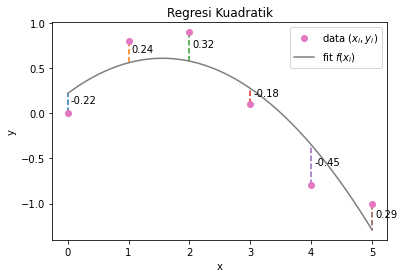

In [14]:
#Definisi fungsi regresi
def f(x, a0, a1, a2):           #Pendefinisian fungsi refresi sebagai komponen dari variabel (x) dan koefisien (a)
  return a0 + a1*x + a2*(x**2)  #Ekspresi persamaan garis regresi berupa polinom berderajat 2

#Perhitungan regresi
init_vals = [1, 1, 1]           #list berisi nilai-nilai dugaan awal untuk masing-masing koefisien (a).
popt, pcov = curve_fit(f, x, y, p0=init_vals)     #"Pencocokan garis" (curve fitting) berdasarkan nilai-nilai x & y
print('Best parameter values: {}'.format(popt))   #Menampilkan nilai-nilai koefisien dari persamaan garis regresi
xfitted = np.linspace(x[0], x[len(data)-1], 50)   #Membuat set 50 nilai x untuk membentuk garis regresi

#Membuat plot residual
ypred = f(x, popt[0], popt[1], popt[2])     #Menyatakan fungsi residual
for i in range(len(data)):                  #Iterasi untuk setiap set data
  xres = [x[i], x[i]]                       #Residual untuk nilai x
  yres = [y[i], ypred[i]]                   #Residual untuk nilai y
  plt.plot(xres, yres, linestyle="dashed")  #Menampilkan garis vertikal antara masing-masing datapoints (x,y) dengan garis regresi
  plt.text(x[i]+0.05, (y[i]+ypred[i])/2, round((y[i]-ypred[i]), 2)) #Menampilkan nilai residual untuk masing-masing (x,y)

#Visualisasi data
plt.plot(x, y, 'o', label = 'data $(x_i,y_i)$')                     #Membuat grafik berisi titik-titik koordinat (x,y) datapoints
plt.plot(xfitted, f(xfitted, *popt), '-', label = 'fit $f(x_i)$')   #Membuat garis regresi kuadratik
plt.title("Regresi Kuadratik")   #Memberu judul grafik
plt.xlabel('x')                  #Memberi label untuk sumbu horizontal
plt.ylabel('y')                  #Memberi label untuk sumbu vertikal
plt.legend()                     #Menampilkan legenda untuk grafik
plt.show()                       #Menampilkan grafik

Regresi Kubik

Best parameter values: [-0.03968254  1.69312169 -0.81349206  0.08703704]


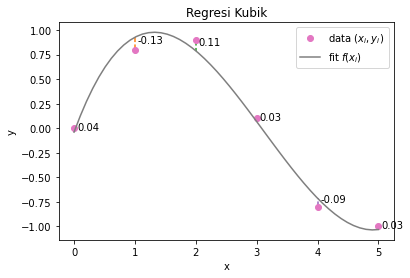

In [15]:
#Definisi fungsi regresi
def f(x, a0, a1, a2, a3):                         #Pendefinisian fungsi refresi sebagai komponen dari variabel (x) dan koefisien (a)
  return a0 + a1*x + a2*(x**2) + a3*(x**3)        #Ekspresi persamaan garis regresi berupa polinom berderajat 3

#Perhitungan regresi
init_vals = [1, 1, 1, 1]                          #list berisi nilai-nilai dugaan awal untuk masing-masing koefisien (a).
popt, pcov = curve_fit(f, x, y, p0=init_vals)     #"Pencocokan garis" (curve fitting) berdasarkan nilai-nilai x & y
print('Best parameter values: {}'.format(popt))   #Menampilkan nilai-nilai koefisien dari persamaan garis regresi
xfitted = np.linspace(x[0], x[len(data)-1], 50)   #Membuat set 50 nilai x untuk membentuk garis regresi

#Membuat plot residual
ypred = f(x, popt[0], popt[1], popt[2],  popt[3]) #Menyatakan fungsi residual
for i in range(len(data)):                  #Iterasi untuk setiap set data
  xres = [x[i], x[i]]                       #Residual untuk nilai x
  yres = [y[i], ypred[i]]                   #Residual untuk nilai y
  plt.plot(xres, yres, linestyle="dashed")  #Menampilkan garis vertikal antara masing-masing datapoints (x,y) dengan garis regresi
  plt.text(x[i]+0.05, (y[i]+ypred[i])/2, round((y[i]-ypred[i]), 2)) #Menampilkan nilai residual untuk masing-masing (x,y)

#Visualisasi data
plt.plot(x, y, 'o', label = 'data $(x_i,y_i)$')                     #Membuat grafik berisi titik-titik koordinat (x,y) datapoints
plt.plot(xfitted, f(xfitted, *popt), '-', label = 'fit $f(x_i)$')   #Membuat garis regresi kubik
plt.title("Regresi Kubik")    #Memberu judul grafik
plt.xlabel('x')               #Memberi label untuk sumbu horizontal
plt.ylabel('y')               #Memberi label untuk sumbu vertikal
plt.legend()                  #Menampilkan legenda untuk grafik
plt.show()                    #Menampilkan grafik